In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Collection and Processing
drilling_data = pd.read_csv('Data.csv')
n=5

# Separate the features (X) from the target variables (Y) for training
X_train = drilling_data.drop(columns=['Drilling Meter', 'Recommendation', 'Layers'], axis=1)
Y_train = drilling_data[['Drilling Meter', 'Recommendation']]  # Use both 'Drilling Meter' and 'Recommendation'
# Training and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=1)

In [20]:
# Model Training --> Logistic Regression
model = MultiOutputClassifier(LogisticRegression(random_state=1))

In [21]:
# Train your Logistic Regression model
model.fit(X_train, Y_train)

C:\Users\ZAINAB\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MultiOutputClassifier(estimator=LogisticRegression(random_state=1))

In [13]:
# Load the test data
test_data = pd.read_csv('Test.csv')

In [15]:
# Provided data for AB/2 and Apparent Resistivity A
AB = np.array([1, 1.5, 2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100])
ar = np.array(test_data.iloc[0])

In [17]:
# Calculate the average values for Apparent Resistivity A
a = [(ar[0] + ar[1]) / 2]
b = [(ar[5] + ar[6] + ar[7]) / 3]
c = [(ar[8] + ar[9] + ar[10]) / 3]
d = [(ar[11] + ar[12] + ar[13]) / 3]
e = [(ar[15] + ar[16]) / 2]

# Create arrays for the specific points
point_ab = np.array([AB[0], AB[5], AB[10], AB[13], AB[16]])
curve_ar = np.array([a[0], b[0], c[0], d[0], e[0]])

In [25]:
# Create a spline interpolation function
f = interp1d(point_ab, curve_ar, kind='cubic')

# Generate a smooth curve
x_smooth = np.logspace(np.log10(point_ab.min()), np.log10(point_ab.max()), 300)
y_smooth = f(x_smooth)

0 not recommended for drilling No of Layers: 5


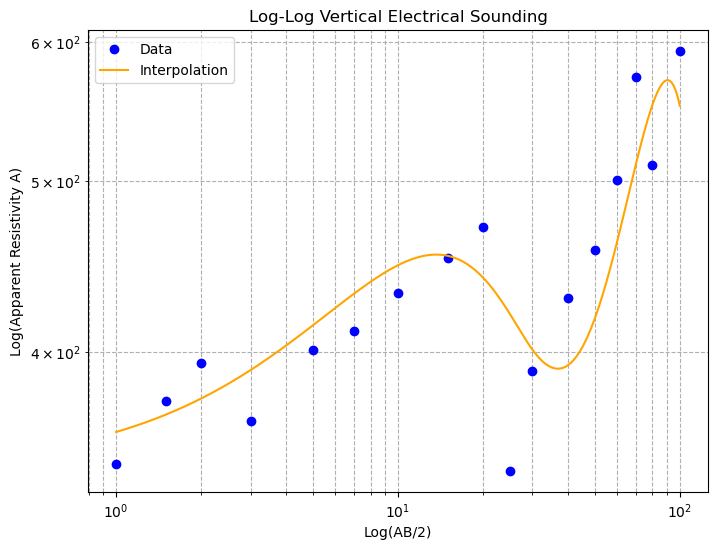

In [26]:
# for prediction of depth
X_test = test_data
#  Y_test = test_data  # Assuming you want to predict 'Recommendation'

# Make predictions on the test data
Y_test_prediction = model.predict(X_test)
for num in Y_test_prediction:
    if num[0] == 0:
        print(0, 'not recommended for drilling '
             f'No of Layers: {n}')
    else:
        print(f'Borehole depth recommended to be {num[0]}m ', f'No of Layers: {n}')

# for graph plotting
# Create a log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(AB, ar, label='Data', marker='o', linestyle='', color='blue')
plt.loglog(x_smooth, y_smooth, label='Interpolation', color='orange', linestyle='-')
plt.xlabel('Log(AB/2)')
plt.ylabel('Log(Apparent Resistivity A)')
plt.title('Log-Log Vertical Electrical Sounding')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()